# Clusters

## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, MeanShift, KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import *

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\cust_data.csv')

# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

cust_info

,customer_name,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,age,education,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,Sara Moscowitz,1999-09-10 15:11:00,0,0,0,2,91.0,20.0,22,22.0,...,0.192154,2017,NaN,38.754263,-9.163397,23,HS,1,1545.0,0
19330,Donald Robertson,1981-06-26 22:58:00,1,0,0,2,197.0,5958.0,21,20.0,...,0.098647,2015,NaN,38.777761,-9.156197,41,HS,0,10219.0,1
2272,Phd. Felicia Bradshaw,1987-01-31 09:08:00,1,1,0,20,397.0,20.0,9,310.0,...,0.497251,2008,NaN,38.785329,-9.127113,36,Phd.,1,1753.0,2
25288,Emma Williams,1942-06-17 00:02:00,3,4,1,2,5282.0,237.0,12,499.0,...,0.206713,2010,NaN,38.744086,-9.156589,80,HS,1,11195.0,7
12829,Hilda Huerta,1999-01-01 00:00:00,0,0,0,2,82.0,22.0,21,9.0,...,0.200625,2015,NaN,38.756024,-9.162970,24,HS,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Phd. Karen Watts,1974-11-01 05:26:00,0,0,1,2,209.0,5474.0,20,18.0,...,0.096366,2008,935162.0,38.734446,-9.171911,48,Phd.,1,9730.0,0
26447,Curtis Thompson,1986-02-21 11:27:00,0,0,0,3,185.0,1066.0,15,267.0,...,0.118998,2014,NaN,38.767070,-9.144301,37,HS,0,2416.0,0
182,Richard Carter,2000-01-01 00:00:00,0,0,0,2,83.0,23.0,23,23.0,...,0.199432,2016,953891.0,38.728487,-9.164140,23,HS,0,1491.0,0


In [4]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,female,total_lifetime_spend,number_dependents
customer_id,,,,,,,,,,,,,,,,,,,,,
4239,0,0,0,2,91.0,20.0,22,22.0,195.0,964.0,...,48.0,47.0,105.0,85.0,0.192154,2017,23,1,1545.0,0
19330,1,0,0,2,197.0,5958.0,21,20.0,1435.0,434.0,...,80.0,45.0,1964.0,85.0,0.098647,2015,41,0,10219.0,1
2272,1,1,0,20,397.0,20.0,9,310.0,379.0,222.0,...,170.0,46.0,5.0,408.0,0.497251,2008,36,1,1753.0,2
25288,3,4,1,2,5282.0,237.0,12,499.0,873.0,460.0,...,1068.0,617.0,1078.0,1956.0,0.206713,2010,80,1,11195.0,7
12829,0,0,0,2,82.0,22.0,21,9.0,172.0,856.0,...,39.0,48.0,103.0,83.0,0.200625,2015,24,1,1370.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0,0,1,2,209.0,5474.0,20,18.0,1435.0,521.0,...,11.0,57.0,1984.0,112.0,0.096366,2008,48,1,9730.0,0
26447,0,0,0,3,185.0,1066.0,15,267.0,276.0,287.0,...,41.0,50.0,197.0,22.0,0.118998,2014,37,0,2416.0,0
182,0,0,0,2,83.0,23.0,23,23.0,189.0,921.0,...,52.0,51.0,94.0,77.0,0.199432,2016,23,0,1491.0,0


## 3. Data Scaling and Normalization

In [5]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

## 4. K-Means

In [6]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [7]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

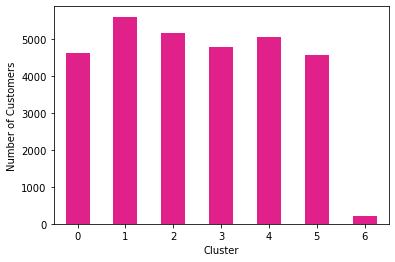

In [8]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

## Analyse by cluster

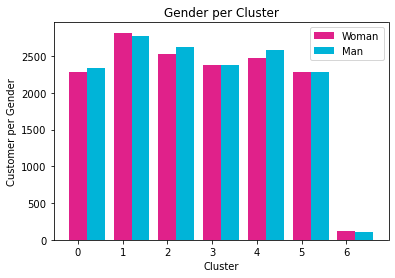

In [37]:
X = num_cust_info['cluster_kmeans'].unique()
X_axis = np.arange(len(X))

# Count the number of customers per gender and cluster
female_counts = num_cust_info[num_cust_info['female'] == 1]['cluster_kmeans'].value_counts().sort_index()
male_counts = num_cust_info[num_cust_info['female'] == 0]['cluster_kmeans'].value_counts().sort_index()

# Plot the bar chart
plt.bar(X_axis, female_counts, 0.4, label='Woman', color='#e0218a')
plt.bar(X_axis + 0.4, male_counts, 0.4, label='Man', color='#00b4d8')

plt.xlabel("Cluster")
plt.ylabel("Customer per Gender")
plt.title("Gender per Cluster")
plt.legend()
plt.show()